# Dataset loading tools

In [19]:
import pycocotools.mask as mask_coco
import cv2
import os
import numpy as np
import pandas as pd
from PIL import Image
import json

from wildlife_tools.data.dataset import WildlifeDataset


## 1. Load metadata

In [16]:
from wildlife_datasets.datasets import SeaTurtleID
root = '/mnt/data/turtles/datasets/datasets/SeaTurtleID'
metadata = SeaTurtleID(root).df
metadata.head()


metadata = pd.read_csv('ExampleDataset/metadata.csv')
dataset = WildlifeDataset(metadata, 'ExampleDataset', transform=Resize(250))
image, label = dataset[0]
image

,image_id,identity,path,split,bbox,date,orientation,segmentation
0,0,t281,images/t281/ILXxnZwvNh.JPG,train,"[769, 593, 135, 145]",2016-07-11 16:53:31,topleft,"{'size': [1333, 2000], 'counts': '[nZo034V1lW1..."
1,1,t281,images/t281/DjtwgIIURL.JPG,train,"[995, 466, 434, 302]",2016-07-11 16:53:13,right,"{'size': [1333, 2000], 'counts': 'jRaX1k1eW1<G..."
2,2,t281,images/t281/hHfmOdhzDU.JPG,train,"[669, 609, 163, 136]",2016-07-11 16:53:33,topleft,"{'size': [1333, 2000], 'counts': 'm`Wk0a0QY15M..."
3,3,t281,images/t281/gTovpgwOut.JPG,test,"[829, 476, 131, 99]",2016-07-11 16:54:03,left,"{'size': [1333, 2000], 'counts': '\nhQ1e0oX12N..."
4,4,t281,images/t281/yUETlrBYAp.JPG,train,"[940, 492, 534, 372]",2016-07-11 16:53:12,right,"{'size': [1333, 2000], 'counts': 'jWXV1T2]W1:F..."


## 2. Create WildlifeDataset
- By default, loads image in 'full' regime.

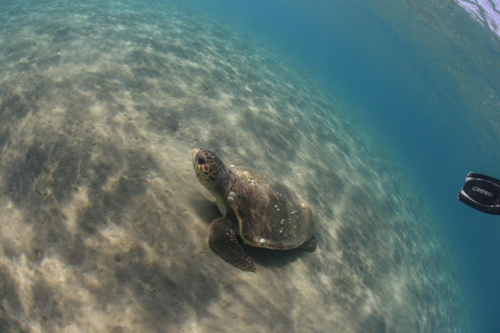

In [20]:
dataset = WildlifeDataset(metadata, root=root)
img, label = dataset[0]
img.resize((img.size[0] // 4, img.size[1] // 4))

## 3. Different load regimes

Full image
- Full image 'full'
- Full image with redacted background 'full_mask'
- Full image with redacted foreground 'full_hide'


BBox Cropping
- BBox cropped 'bbox'
- BBox cropped with redacted background 'bbox_mask'
- BBox cropped with redacted foreground 'bbox_hide'

Other
- Cropping black background if there is one 'crop_black'

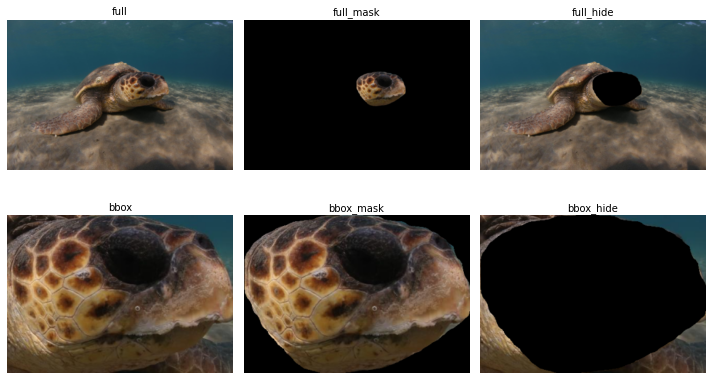

In [1]:
from wildlife_tools.data.dataset import WildlifeDataset
from torchvision.transforms import Resize
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

metadata = pd.read_csv('ExampleDataset/metadata.csv')

fig, axes = plt.subplots(2, 3, figsize=(10, 6))
axes = axes.flatten()

methods = ['full', 'full_mask', 'full_hide', 'bbox', 'bbox_mask', 'bbox_hide']
for i, method in enumerate(methods):
    dataset = WildlifeDataset(metadata, 'ExampleDataset', img_load=method, transform=Resize(256))
    img, _ = dataset[0]

    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(method, fontsize=10, pad=5)

plt.tight_layout()
plt.savefig('loading_methods.png')
plt.show()

## 4. Add Transform pipeline

In [63]:
from torchvision import transforms as T
transform = T.Compose([
    T.Resize([256, 256]),
    T.ToTensor(),
])
dataset = WildlifeDataset(metadata, root=root, img_load='full', transform=transform)
img, label = dataset[0]
print(img.shape)
img

torch.Size([3, 256, 256])


tensor([[[0.3020, 0.3059, 0.3059,  ..., 0.6627, 0.6784, 0.6627],
         [0.2980, 0.2941, 0.3020,  ..., 0.6431, 0.6745, 0.6667],
         [0.3098, 0.3098, 0.2980,  ..., 0.5922, 0.6471, 0.6627],
         ...,
         [0.2510, 0.2588, 0.2863,  ..., 0.1216, 0.1216, 0.1176],
         [0.2510, 0.2745, 0.2902,  ..., 0.1176, 0.1216, 0.1176],
         [0.2667, 0.3059, 0.3176,  ..., 0.1176, 0.1098, 0.1098]],

        [[0.4902, 0.4941, 0.4941,  ..., 0.6784, 0.6902, 0.6706],
         [0.4824, 0.4784, 0.4863,  ..., 0.6706, 0.6902, 0.6784],
         [0.4784, 0.4824, 0.4706,  ..., 0.6353, 0.6667, 0.6745],
         ...,
         [0.2706, 0.2784, 0.2941,  ..., 0.3176, 0.3137, 0.3059],
         [0.2784, 0.3020, 0.3020,  ..., 0.3176, 0.3098, 0.3059],
         [0.2863, 0.3176, 0.3216,  ..., 0.3176, 0.3098, 0.3098]],

        [[0.5059, 0.5098, 0.5098,  ..., 0.8706, 0.9098, 0.9020],
         [0.4980, 0.4980, 0.5020,  ..., 0.8314, 0.8824, 0.8980],
         [0.5020, 0.5020, 0.4941,  ..., 0.7608, 0.8314, 0.